In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv("/Users/rahulmanchanda/Desktop/python/Linear Regression/economic_index.csv")

In [5]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [7]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [8]:
df.drop(columns=["year","month"],axis=1,inplace=True)

In [9]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [10]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

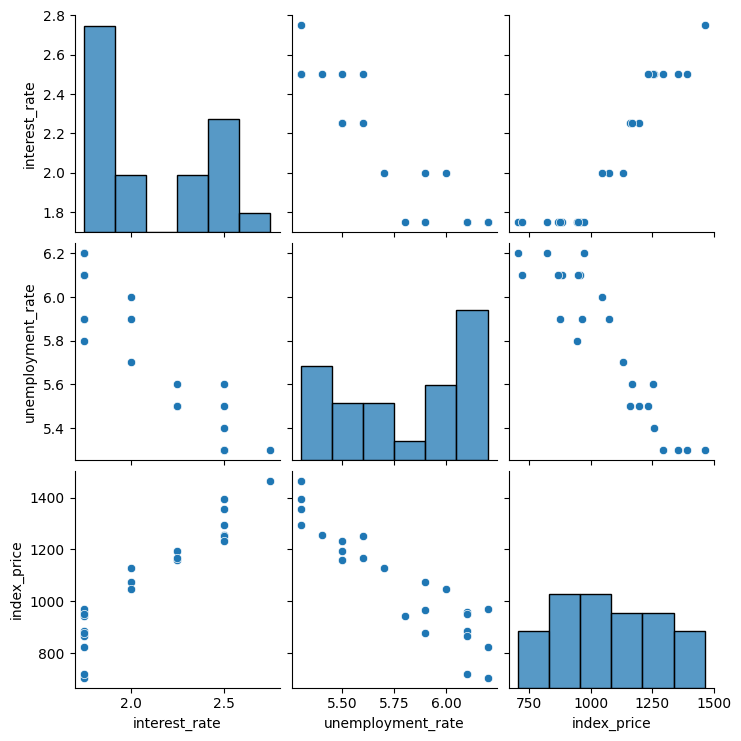

In [11]:
sns.pairplot(data=df)

In [12]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

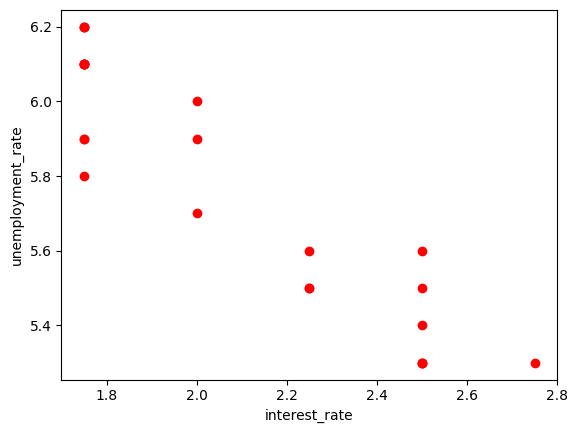

In [15]:
plt.scatter(df["interest_rate"],df["unemployment_rate"],color="r")
plt.xlabel("interest_rate")
plt.ylabel("unemployment_rate")

In [16]:
X,y=df[["unemployment_rate","interest_rate"]],df["index_price"]

In [19]:
X.head()


,unemployment_rate,interest_rate
0,5.3,2.75
1,5.3,2.50
2,5.3,2.50
3,5.3,2.50
4,5.4,2.50


In [20]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

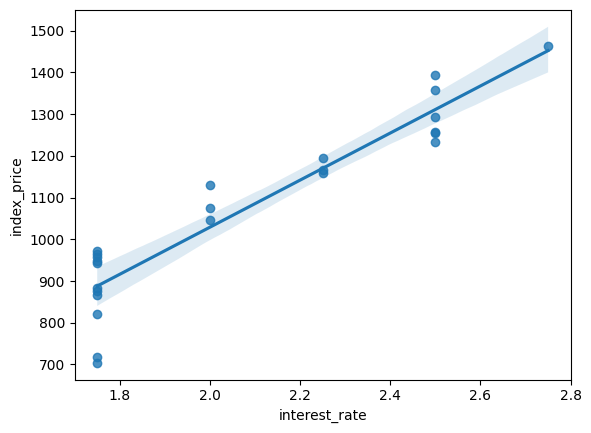

In [26]:
sns.regplot(x=df["interest_rate"],y=df["index_price"])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

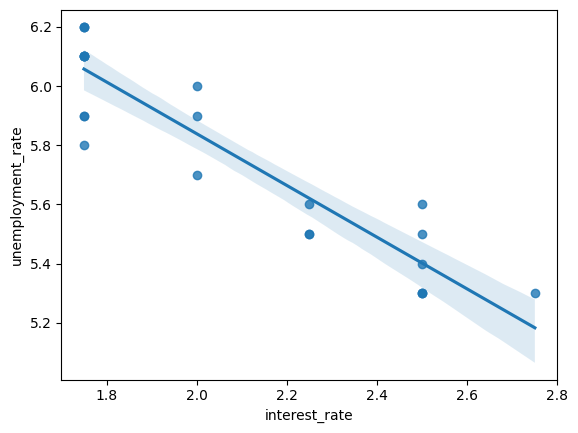

In [27]:
sns.regplot(x=df["interest_rate"],y=df["unemployment_rate"])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

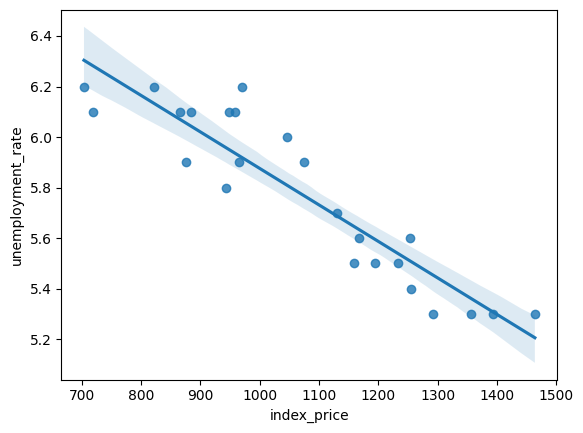

In [29]:
sns.regplot(x=df["index_price"],y=df["unemployment_rate"])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(X_train)

array([[ 0.37908503, -0.90115511],
       [-1.48187786,  1.31077107],
       [ 1.30956648, -0.90115511],
       [-0.55139641,  1.31077107],
       [-1.48187786,  1.31077107],
       [ 0.68924552, -0.16384638],
       [ 0.999406  , -0.90115511],
       [-1.48187786,  1.31077107],
       [-1.17171738,  1.31077107],
       [ 1.30956648, -0.90115511],
       [ 0.999406  , -0.90115511],
       [ 0.37908503, -0.90115511],
       [ 0.999406  , -0.90115511],
       [-0.8615569 ,  0.57346234],
       [-0.24123593, -0.16384638],
       [ 0.06892455, -0.90115511],
       [ 0.999406  , -0.90115511],
       [-0.8615569 ,  1.31077107]])

In [32]:
scaler.fit_transform(X_test)

array([[-0.82078268,  0.36115756],
       [ 1.33377186, -1.08347268],
       [-1.43636969,  1.8057878 ],
       [ 1.02597835, -1.08347268],
       [ 0.41039134, -0.36115756],
       [-0.51298918,  0.36115756]])

In [33]:
from sklearn.linear_model import LinearRegression
Regression=LinearRegression()
Regression.fit(X_train,y_train)

LinearRegression()

In [36]:
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(Regression,X_train,y_train,scoring="neg_mean_squared_error",cv=3)

In [38]:
validation_score.mean()

np.float64(-5914.828180162386)

In [39]:
y_predict=Regression.predict(X_test)

In [41]:
y_predict

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [43]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
rmse=np.sqrt(mse)



In [44]:
mse,mae,rmse

(5793.762887712558, 59.93578152323547, np.float64(76.11677139574797))

In [45]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_predict)
r2

0.8278978091457149

In [46]:
# Assumptions 
residuals=y_test-y_predict
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


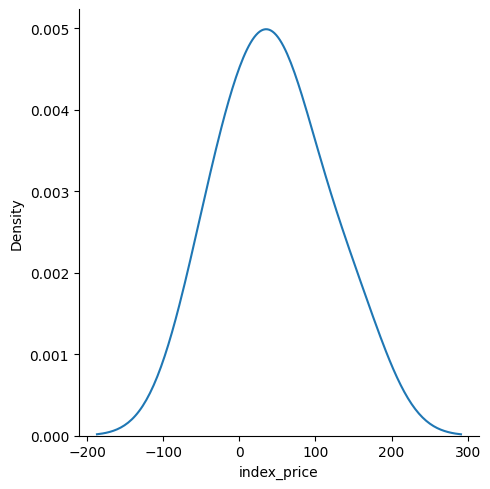

In [48]:
sns.displot(residuals,kind="kde")